In [1]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import pandas as pd
from matplotlib import font_manager

---

# Real

## ACT

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks90 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks90.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
windowlen = 5
map_pix = actmap

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacks150 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks150.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks220 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks220.append(stack_CMB_kSZ[0])

## Planck

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks100 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks100.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks143 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks143.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks217 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks217.append(stack_CMB_kSZ[0])

In [ ]:
awd

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/wh22.csv', skiprows = 0)
zs = [1, 100]
rhs = [0, 100000]

stacks353 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
                decs = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
                decs = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
            decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
            decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks353.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacks545 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks545.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/wh22.csv', skiprows = 0)
awd = awd[awd.z>=1]
zs = [1, 100]
rhs = [0, 100000]

stacks857 = []
lens = []
riches = []
reds = []
# for j in range(len(zs)):
#     for k in range(len(rhs)):
stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
#         riches.append(rhs[k])
#         reds.append(zs[j])
#         if j == len(zs)-1:
#             if k == len(rhs)-1:
#                 print(zs[j],0)
#                 print(rhs[k],0)
#                 ras = awd['ra'].reset_index(drop=True)
#                 decs = awd['dec'].reset_index(drop=True)
#             else:
#                 print(zs[j],0)
#                 print(rhs[k+1],rhs[k])
#                 ras = awd['ra'].reset_index(drop=True)
#                 decs = awd['dec'].reset_index(drop=True)
#         elif k == len(rhs)-1:
#             print(zs[j+1],zs[j])
#             print(rhs[k],0)
#             ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
#             decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
#         else:
#             print(zs[j+1],zs[j])
#             print(rhs[k+1],rhs[k])
#             ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
#             decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)

ras = awd['ra'].reset_index(drop=True)
decs = awd['dec'].reset_index(drop=True)

N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks857.append(stack_CMB_kSZ[0])

In [2]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacksros = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacksros.append(stack_CMB_kSZ[0])

100%|█████████████████████████████████████████████████| 201326592/201326592 [00:44<00:00, 4484705.79it/s]


Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting
100 0
100000 0


100%|█████████████████████████████████████████████████████████████| 21538/21538 [01:32<00:00, 234.03it/s]


100 0
100000 0


100%|█████████████████████████████████████████████████████████████| 21538/21538 [01:31<00:00, 236.64it/s]


100 0
100000 0


100%|█████████████████████████████████████████████████████████████| 21538/21538 [01:29<00:00, 240.39it/s]


100 0
100000 0


100%|█████████████████████████████████████████████████████████████| 21538/21538 [01:30<00:00, 237.80it/s]


---

---

---

---

# Non-clusters

## ACT

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks90 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks90.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks150 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks150.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks220 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks220.append(stack_CMB_kSZ[0])

## Planck

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks100 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks100.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks143 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks143.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks217 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks217.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks353 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks353.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks545 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks545.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks857 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks857.append(stack_CMB_kSZ[0])

In [ ]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacksros = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacksros.append(stack_CMB_kSZ[0])

---

---

---

---

# Real

In [ ]:
font_path = 'data/cmunrm.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
i = 0

for j,row in enumerate(ax):
    for k, col in enumerate(row):
        f1 = col.imshow(stacks220[i])
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        plt.colorbar(mappable = f1, ax = col,orientation='horizontal',fraction=0.047, pad=0.02)
        scalebar = AnchoredSizeBar(ax[0][0].transData,
                                   4.4, '', 'center left', 
                                   pad=0.,
                                   sep=-7,
                                   color='white',
                                   frameon=False,
                                   size_vertical=0.02)
        ax[0][0].add_artist(scalebar)
        ax[0][0].text(0.1, 0.4, 'R = 10$\,$\''.format(10), c='white', fontsize=18, transform=ax[0][0].transAxes)

        col.text(0.3,0.5,"N={}".format(lens[i]),color='red')
        if j==0 and k==0:
            col.text(-5,4.2,"z<0.32",size=20)
        if j==1 and k==0:
            col.text(-5,4.2,"z>0.32",size=20)
        if j==2 and k==0:
            col.text(-5,4.2,"All z",size=20)
        if k==0 and j==0:
            col.text(3,-3,"rh<27",size=20)
        if k==1 and j==0:
            col.text(3,-3,"rh>27",size=20)
        if k==2 and j==0:
            col.text(3,-3,"All rh",size=20)

        i+=1

plt.savefig("output/stacks220_zoom.png")
plt.show()

---

# Non-clusters

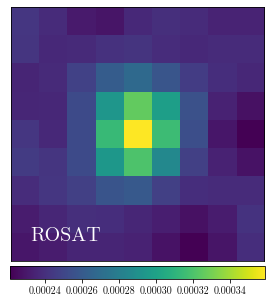

In [3]:
font_path = 'data/cmunrm.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(figsize=(5,5))
i = 0

f1 = ax.imshow(stacksros[i])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.colorbar(mappable = f1, ax = ax,orientation='horizontal',fraction=0.047, pad=0.02)
scalebar = AnchoredSizeBar(ax.transData,
                           4.4, '', 'center left', 
                           pad=0.,
                           sep=-7,
                           color='white',
                           frameon=False,
                           size_vertical=0.02)
# ax.add_artist(scalebar)
# ax.text(0.1, 0.4, 'R = 10$\,$\''.format(10), c='white', fontsize=18, transform=ax.transAxes)

# ax.text(0.2,.7,"N={}".format(lens[i]),color='white',fontsize=20)
ax.text(0.2,7.8,"ROSAT".format(lens[i]),color='white',fontsize=20)

i+=1

plt.savefig("output/stacksros.png")
plt.show()